# **Descriptive Analysis Of All The World's Billionaires From 2021**
*(Data Source: Forbes)*

**1. Import the packages necessary for the following analysis.**

In [1]:
import matplotlib.pyplot as plt  # import the package and call it 'plt'
import polars as pl  # import polars and call it 'pl'

**2. Read the data using polar and print the data & its statistics**.

In [2]:
pl_df = pl.read_csv("Billionaire_2021.csv", null_values=["N/A"])
pl_df

Name,NetWorth,Country,Source,Rank,Age,Industry
str,str,str,str,i64,i64,str
"""Jeff Bezos""","""$177 B""","""United States""","""Amazon""",1,57,"""Technology"""
"""Elon Musk""","""$151 B""","""United States""","""Tesla, SpaceX""",2,49,"""Automotive"""
"""Bernard Arnault & family""","""$150 B""","""France""","""LVMH""",3,72,"""Fashion & Retail"""
"""Bill Gates""","""$124 B""","""United States""","""Microsoft""",4,65,"""Technology"""
"""Mark Zuckerberg""","""$97 B""","""United States""","""Facebook""",5,36,"""Technology"""
…,…,…,…,…,…,…
"""Daniel Yong Zhang""","""$1 B""","""China""","""e-commerce""",2674,49,"""Technology"""
"""Zhang Yuqiang""","""$1 B""","""China""","""Fiberglass""",2674,65,"""Manufacturing"""
"""Zhao Meiguang""","""$1 B""","""China""","""gold mining""",2674,58,"""Metals & Mining"""


In [3]:
pl_df.describe()

statistic,Name,NetWorth,Country,Source,Rank,Age,Industry
str,str,str,str,str,f64,f64,str
"""count""","""2755""","""2755""","""2755""","""2755""",2755.0,2676.0,"""2755"""
"""null_count""","""0""","""0""","""0""","""0""",0.0,79.0,"""0"""
"""mean""",null,null,null,null,1345.663521,63.113602,null
"""std""",null,null,null,null,772.669811,13.445153,null
"""min""","""A. Jayson Adair""","""$1 B""","""Algeria""","""3D printing""",1.0,18.0,"""Automotive"""
"""25%""",null,null,null,null,680.0,54.0,null
"""50%""",null,null,null,null,1362.0,63.0,null
"""75%""",null,null,null,null,2035.0,73.0,null
"""max""","""Zygmunt Solorz-Zak""","""$97 B""","""Zimbabwe""","""★""",2674.0,99.0,"""Telecom"""


**3. Determine how many billionaires there are from each country in this dataset.**

In [4]:
country_count = pl_df.select(pl.col("Country").value_counts())
country_count

Country
struct[2]
"{""Mexico"",13}"
"{""Romania"",2}"
"{""Japan"",49}"
"{""South Africa"",5}"
"{""Egypt"",6}"
…
"{""Qatar"",2}"
"{""China"",626}"
"{""Czechia"",9}"


In [5]:
print(country_count.columns)
print(country_count.dtypes)

['Country']
[Struct({'Country': String, 'count': UInt32})]


In [6]:
# get 'count' value
count_values = country_count.select(
    pl.col("Country").struct.field("count").alias("count")
)

# get the statistics for the distribution of billionaires
stats = count_values.select(
    [
        pl.col("count").mean().alias("Mean"),
        pl.col("count").median().alias("Median"),
        pl.col("count").std().alias("Standard_Deviation"),
    ]
)

stats

Mean,Median,Standard_Deviation
f64,f64,f64
39.357143,7.0,114.120841


**6. Make a barplot that shows the counts of how many billionaires there are from each country.**

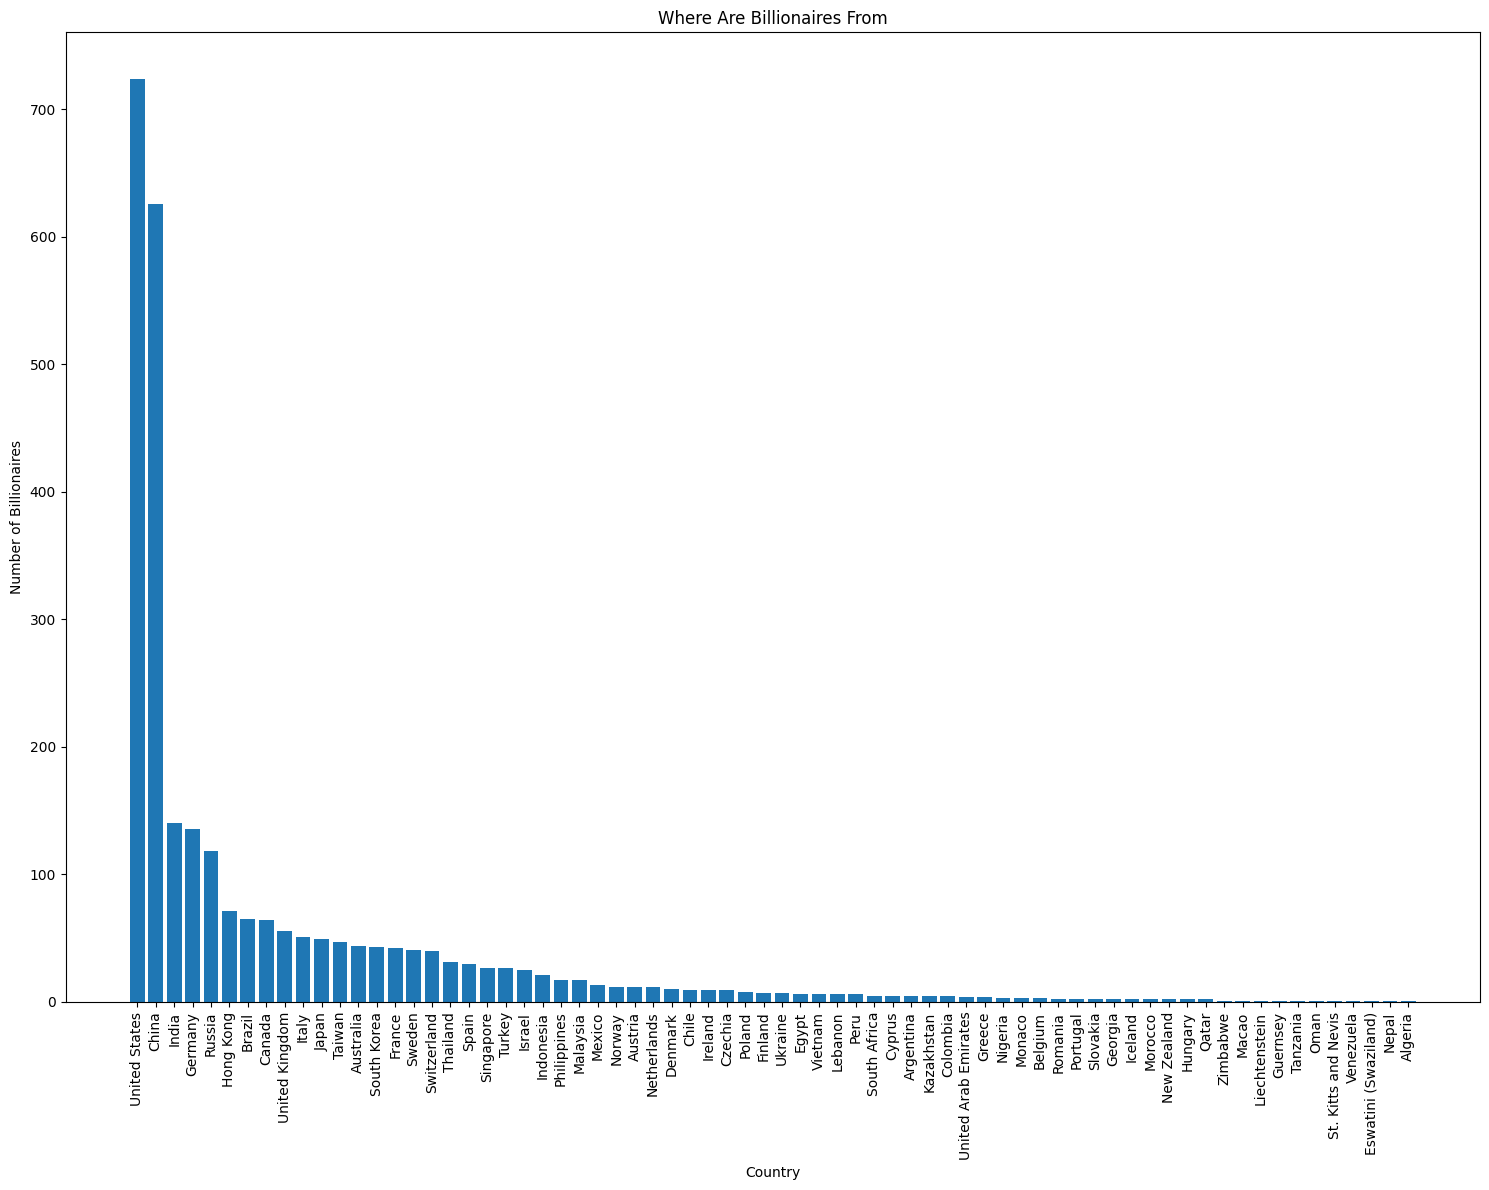

In [7]:
# get value from country_count DataFrame since its a pl dataframe
countries = country_count.select(pl.col("Country").struct.field("Country")).to_series()
counts = country_count.select(pl.col("Country").struct.field("count")).to_series()
# sort the value
sorted_data = sorted(zip(countries, counts), key=lambda x: x[1], reverse=True)
countries, counts = zip(*sorted_data)

# plot
plt.figure(figsize=(15, 12))
plt.bar(countries, counts)
plt.title("Where Are Billionaires From")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**5. Summary**  
In 2021, <u>nearly **half of the world's billionaires** hailed from just two countries: **the United States and China**</u>. The U.S. led with **724** billionaires, closely followed by China with **626**. There was a significant gap between these top two nations and the third-placed India, which had **140** billionaires. The large standard deviation in billionaire counts across countries indicates a <u>**substantial disparity in the distribution of ultra-high net worth individuals globally**</u>. The bar plot of billionaire populations by country exhibits a pronounced <u>**right-skewed distribution**</u>, which is consistent with the relatively low median of 7 billionaires per country. This skewness reflects the concentration of extreme wealth in a small number of nations, while most countries have comparatively few billionaires.
